In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import time

import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

from kdelearn.kde import KDE
from kdelearn.kde_tasks import KDEOutliersDetection, KDEClustering, KDEClassification
from sklearn.neighbors import KernelDensity
from kdelearn.ckde import CKDE

In [4]:
np.random.seed(0)

In [5]:
# Prepare data
m_train = 50
n = 1
x_train = np.random.normal(size=(m_train, n))
weights_train = np.full(m_train, 1 / m_train)  # equally weighted

# Prepare testing grid
m_test = 100  # grid size
x_test = np.linspace(-3, 3, m_test).reshape(m_test, n)


# Kernel Density Estimation - KDE
kde1 = KDE(kernel_name="gaussian").fit(x_train, weights_train, bandwidth_method="normal_reference")
scores1 = kde1.pdf(x_test)

kde2 = KDE(kernel_name="uniform").fit(x_train, weights_train, bandwidth_method="direct_plugin")
scores2 = kde2.pdf(x_test)

# KDE

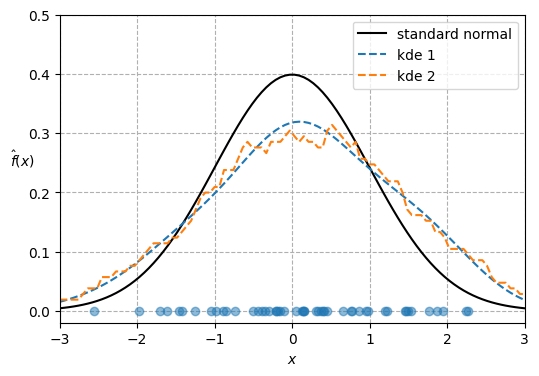

In [6]:
plt.figure(figsize=(6, 4))

plt.scatter(x_train[:,0], x_train[:,0]*0, zorder=2, alpha=0.5)
plt.plot(x_test, norm.pdf(x_test), label="standard normal", c="k")
plt.plot(x_test, scores1, label="kde 1", linestyle="--")
plt.plot(x_test, scores2, label="kde 2", linestyle="--")

plt.legend()
plt.xlim(-3, 3)
plt.ylim(top=0.5)
plt.xlabel("$x$")
plt.ylabel("$\hat{f}(x)$", rotation=0)
plt.grid(linestyle="--")
# plt.savefig("kde_plot.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Outliers detection

In [7]:
np.random.seed(0)

In [8]:
# Prepare data
m_train = 50
n = 1
x_train = np.random.normal(size=(m_train, n))
weights_train = np.full(m_train, 1 / m_train)  # equally weighted

# Fit
outliers_detector = KDEOutliersDetection(kernel_name="gaussian")
outliers_detector = outliers_detector.fit(x_train, weights_train, r=0.1)

# Predict outliers
labels_pred = outliers_detector.predict(x_train)

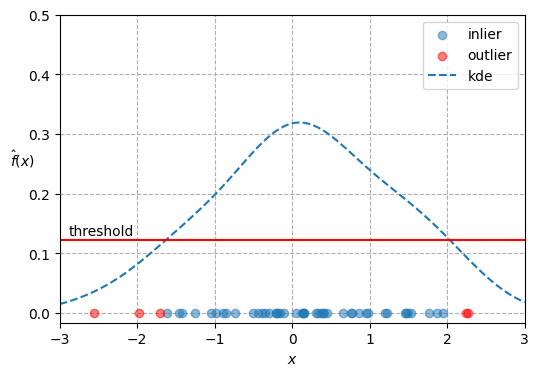

In [9]:
plt.figure(figsize=(6, 4))

plt.scatter(x_train[labels_pred==0,0], x_train[labels_pred==0,0]*0, zorder=2, alpha=0.5, label="inlier")
plt.scatter(x_train[labels_pred==1,0], x_train[labels_pred==1,0]*0, zorder=2, alpha=0.5, c="r", label="outlier")
plt.plot(x_test, scores1, label="kde", linestyle="--")
plt.hlines(outliers_detector.threshold, -3, 3, color="red")
plt.text(-2.88, 0.13, "threshold")

plt.legend()
plt.xlim(-3, 3)
plt.ylim(top=0.5)
plt.xlabel("$x$")
plt.ylabel("$\hat{f}(x)$", rotation=0)
plt.grid(linestyle="--")
# plt.savefig("outliers_plot.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Clustering

In [10]:
np.random.seed(0)

In [11]:
# Prepare data - gaussian mixture
m_train = 100
n = 1
x_train1 = np.random.normal(size=(m_train // 2, n))
x_train2 = np.random.normal(4, 1, size=(m_train // 2, n))
x_train = np.concatenate((x_train1, x_train2))
weights_train = np.full(m_train, 1 / m_train)  # equally weighted

# Fit
clustering = KDEClustering().fit(x_train, weights_train)

# Predict labels of clusters
labels_pred = clustering.predict(algorithm="gradient_ascent")

In [12]:
# Prepare testing grid
m_test = 100  # grid size
n = 1
x_test = np.linspace(-3, 7, m_test).reshape(m_test, n)

# Kernel Density Estimation - KDE
kde = KDE(kernel_name="gaussian").fit(x_train, weights_train, bandwidth_method="normal_reference")
scores = kde.pdf(x_test)

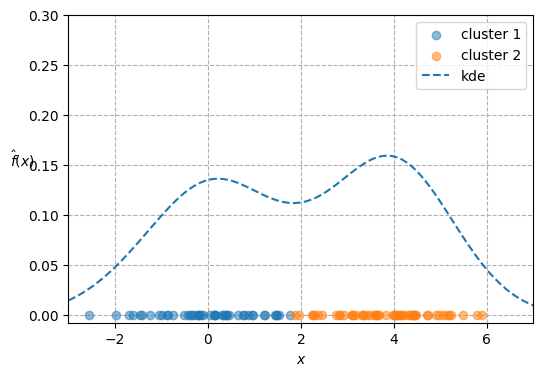

In [13]:
plt.figure(figsize=(6, 4))

plt.scatter(x_train[labels_pred==0,0], x_train[labels_pred==0,0]*0, zorder=2, alpha=0.5, label="cluster 1")
plt.scatter(x_train[labels_pred==1,0], x_train[labels_pred==1,0]*0, zorder=2, alpha=0.5, label="cluster 2")
plt.plot(x_test, scores, label="kde", linestyle="--")

plt.legend()
plt.xlim(-3, 7)
plt.ylim(top=0.3)
plt.xlabel("$x$")
plt.ylabel("$\hat{f}(x)$", rotation=0)
plt.grid(linestyle="--")
# plt.savefig("clustering_plot.pdf", format="pdf", bbox_inches="tight")
plt.show()

## Classification

In [14]:
np.random.seed(0)

In [15]:
# Prepare data - gaussian mixture
m_train = 100
n = 1
x_train1 = np.random.normal(size=(m_train // 2, n))
labels_train1 = np.full(m_train // 2, 1)
x_train2 = np.random.normal(4, 1, size=(m_train // 2, n))
labels_train2 = np.full(m_train // 2, 2)
x_train = np.concatenate((x_train1, x_train2))
labels_train = np.concatenate((labels_train1, labels_train2))
weights_train = np.full(m_train, 1 / m_train)  # equally weighted

# Fit
classification = KDEClassification(kernel_name="gaussian").fit(x_train, labels_train, weights_train)

# Predict labels of classes
labels_pred = classification.predict(x_train)

In [16]:
# Prepare testing grid
m_test = 100  # grid size
n = 1
x_test = np.linspace(-3, 7, m_test).reshape(m_test, n)

# Kernel Density Estimation - KDE
kde1 = KDE(kernel_name="gaussian").fit(x_train1, weights_train[:50], bandwidth_method="normal_reference")
scores1 = kde1.pdf(x_test)

kde2 = KDE(kernel_name="gaussian").fit(x_train2, weights_train[50:], bandwidth_method="normal_reference")
scores2 = kde2.pdf(x_test)

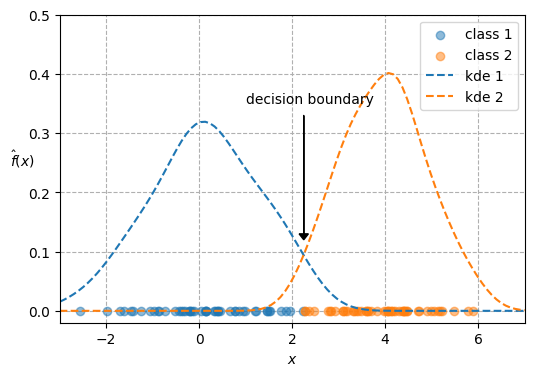

In [17]:
plt.figure(figsize=(6, 4))

plt.scatter(x_train[labels_pred==1,0], x_train[labels_pred==1,0]*0, zorder=2, alpha=0.5, label="class 1")
plt.scatter(x_train[labels_pred==2,0], x_train[labels_pred==2,0]*0, zorder=2, alpha=0.5, label="class 2")
plt.plot(x_test, scores1, label="kde 1", linestyle="--")
plt.plot(x_test, scores2, label="kde 2", linestyle="--")
plt.arrow(2.25, 0.33, 0, -0.2, head_width=0.2, head_length=0.01, fc='k', ec='k', zorder=2)
plt.text(1, 0.35, "decision boundary")

plt.legend()
plt.xlim(-3, 7)
plt.ylim(top=0.5)
plt.xlabel("$x$")
plt.ylabel("$\hat{f}(x)$", rotation=0)
plt.grid(linestyle="--")
# plt.savefig("classification_plot.pdf", format="pdf", bbox_inches="tight")
plt.show()

# Comparison with sklearn

In [37]:
def kdelearn_kde(x_train, x_test):
    bandwidth = np.array([1.0])
    KDE("gaussian").fit(x_train, bandwidth=bandwidth).pdf(x_test)

def sklearn_kde(x_train, x_test):
    KernelDensity(bandwidth=1.0, kernel="gaussian").fit(x_train).score_samples(x_test)

kde_funcs = [[kdelearn_kde, "my_kde"], [sklearn_kde, "sklearn_kde"]]

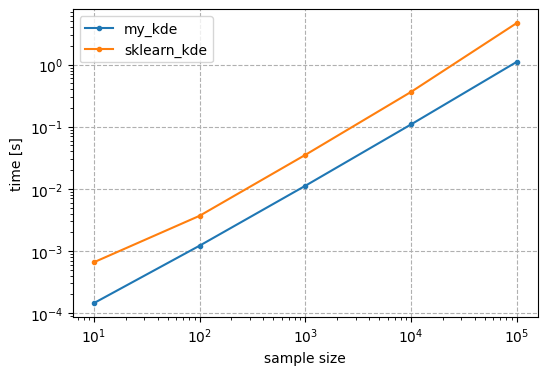

In [42]:
np.random.seed(0)

m_test = 1000
x_test = np.linspace(-4, 4, m_test)[:, None]
repeats = 5

plt.figure(figsize=(6, 4))

for fun, fun_name in kde_funcs:
    avg_results = []
    m = []
    for m_train in [10 ** i for i in range(1, 6)]:  # 9 - max
        
        x_train = np.random.normal(0, 1, size=(m_train, 1))
        results = []
        for _ in range(repeats):
            start_time = time.time()
            fun(x_train, x_test)
            elapsed_time = time.time() - start_time
            results.append(elapsed_time)
        avg_results.append(np.mean(results))
        m.append(m_train)

    plt.plot(m, avg_results, ".-", label=fun_name)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("sample size")
plt.ylabel("time [s]")
plt.legend()
plt.grid(linestyle="--")
# plt.savefig("performance.pdf", format="pdf", bbox_inches="tight")
plt.show()

# CKDE

In [93]:
np.random.seed(0)

In [94]:
# Prepare data
m_train = 500
n_X, n_Y = 1, 1
z_train = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], size=m_train)
x_train, y_train = z_train[:,:1], z_train[:,1:]
weights_train = np.full(m_train, 1 / m_train)  # equally weighted
y_star = np.array([0.])

# Prepare testing grid
m_test = 100  # grid size
x_test = np.linspace(-4, 4, m_test).reshape(m_test, n_X)

In [95]:
ckde = CKDE(kernel_name="gaussian").fit(x_train, y_train, y_star)
scores, _ = ckde.pdf(x_test)

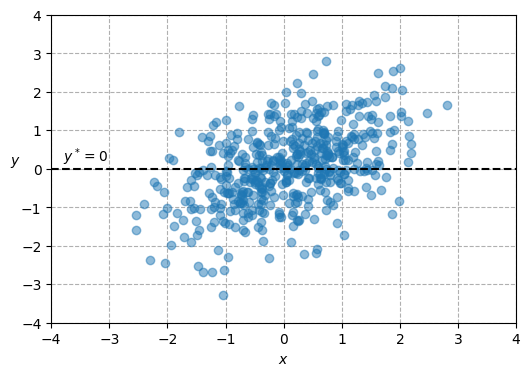

In [96]:
plt.figure(figsize=(6, 4))

plt.scatter(x_train, y_train, zorder=2, alpha=0.5)
plt.hlines(0, -4, 4, color="k", linestyle="--")
plt.text(-3.8, 0.2, "$y^*=0$")

plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel("$x$")
plt.ylabel("$y$", rotation=0)
plt.grid(linestyle="--")
# plt.savefig("ckde_data.pdf", format="pdf", bbox_inches="tight")
plt.show()

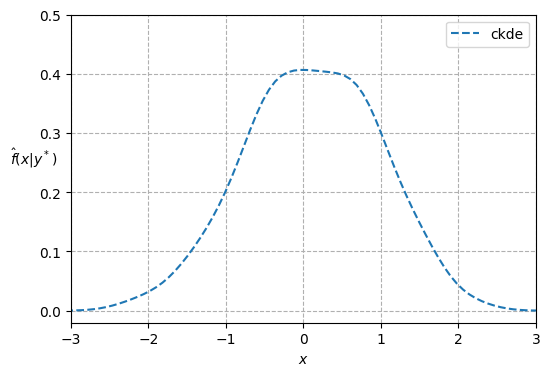

In [97]:
plt.figure(figsize=(6, 4))

plt.plot(x_test, scores, label="ckde", linestyle="--")

plt.legend()
plt.xlim(-3, 3)
plt.ylim(top=0.5)
plt.xlabel("$x$")
plt.ylabel("$\hat{f}(x|y^*)$", rotation=0)
plt.grid(linestyle="--")
# plt.savefig("ckde_plot.pdf", format="pdf", bbox_inches="tight")
plt.show()